In [1]:
# run experiments for different values of alpha on source and target distributions

In [2]:
import subprocess

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#params
times = 10
shift_alpha = np.arange(0.01, 0.2, 0.01)
result = ['oracle', 'naive', 'bbse', 'malls', 'masiw']
delta = 1e-9
m_updates = 3

In [4]:
def get_results(alpha, seed):
    cmd = f'python3 masiw.py -source_alpha={alpha} -validation_ratio=0.15 -seed={seed} -keep_source=0 '+\
    f'-target_alpha={alpha} -keep_target=0 -delta={delta} -lambda_rlls=0.9 -meta_updates={m_updates}'
    val = str(subprocess.check_output(cmd, shell=True)).splitlines()[0][2:-3].split('\\n')
    for i, x in enumerate(val):
        val[i] = float(x)
    return np.array(val)

In [5]:
def one_round_alpha(alpha):
    alpha_shift = []
    for i in range(times):
        alpha_shift.append( get_results(alpha, i) )
    alpha_shift = np.array(alpha_shift).T    
    return np.mean(alpha_shift, axis=1), np.var(alpha_shift, axis=1)

In [6]:
mean_shifts = []
std_shifts = []
for alpha in tqdm(shift_alpha):
    u, sig = one_round_alpha(alpha)
    mean_shifts.append(u)
    std_shifts.append(sig)
    
mean_shifts, std_shifts = np.array(mean_shifts).T, np.array(std_shifts).T

100%|██████████| 19/19 [52:59<00:00, 167.37s/it]


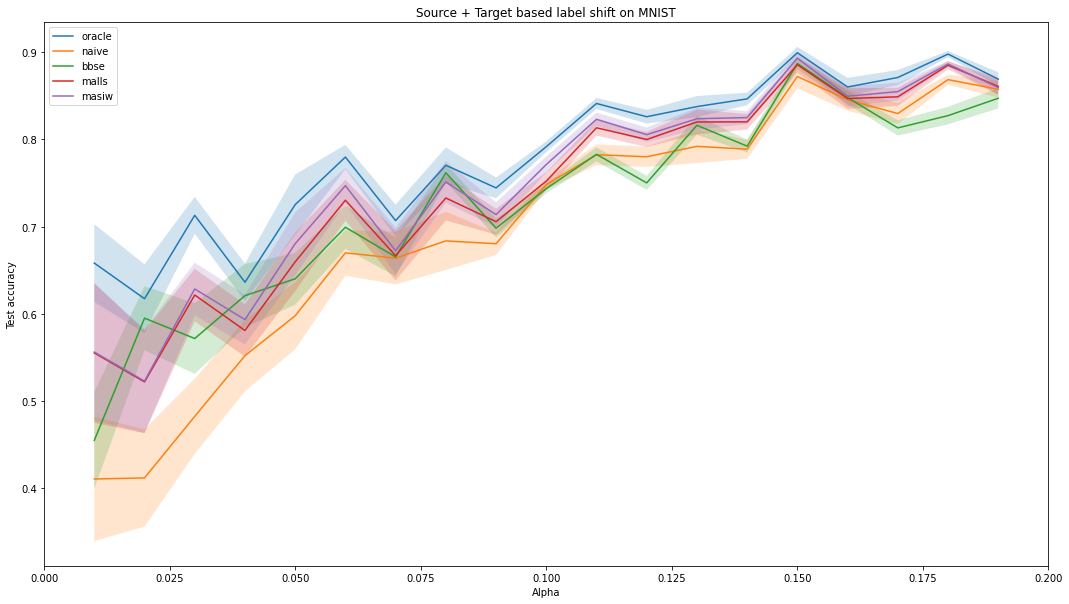

In [7]:
plt.figure(figsize=(18, 10))
for i, a in enumerate(result):
    plt.plot(shift_alpha, mean_shifts[i], label=a)
    plt.fill_between(shift_alpha, (mean_shifts[i] - std_shifts[i]), (mean_shifts[i] + std_shifts[i]), alpha=0.2)
plt.xlim((0, 0.2))

plt.xlabel('Alpha')    
plt.ylabel('Test accuracy')
plt.title('Source + Target based label shift on MNIST')
plt.legend()
plt.show()

In [8]:
elems = {result[i] : [mean_shifts[i], std_shifts[i]] for i in range(len(mean_shifts))}

In [9]:
del elems['oracle']
# del elems['malls']
del elems['bbse']

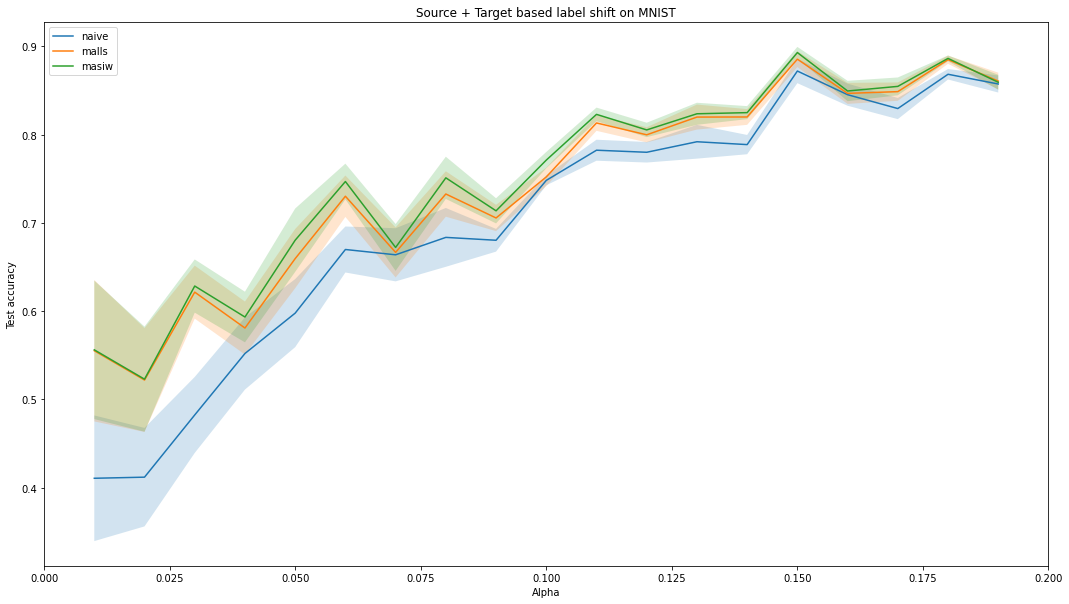

In [10]:
plt.figure(figsize=(18, 10))
for i in elems:
    plt.plot(shift_alpha, elems[i][0], label=i)
    plt.fill_between(shift_alpha, (elems[i][0] - elems[i][1]), (elems[i][0] + elems[i][1]), alpha=0.2)

plt.xlim((0, 0.2))
plt.xlabel('Alpha')    
plt.ylabel('Test accuracy')
plt.title('Source + Target based label shift on MNIST')
plt.legend()
plt.show()

In [11]:
pd.DataFrame(mean_shifts.T, columns=result, index=shift_alpha).describe()

,oracle,naive,bbse,malls,masiw
count,19.000000,19.000000,19.000000,19.000000,19.000000
mean,0.783722,0.700863,0.727043,0.742433,0.750336
std,0.088311,0.149422,0.112854,0.114518,0.113645
min,0.617309,0.410607,0.454890,0.521929,0.522904
25%,0.719034,0.630801,0.652632,0.663072,0.676304
50%,0.791594,0.748187,0.750091,0.752096,0.771155
75%,0.853219,0.810789,0.814646,0.833422,0.837226
max,0.899321,0.872113,0.886957,0.885566,0.893048
